In [1]:
from skimage.io import imread, imshow, imsave
from skimage.color import gray2rgb
import numpy as np

## 1а)Заливка заданным цветом.

In [2]:
path = "Рабочий стол/tikva.png"

In [3]:
img = gray2rgb(imread(path))

In [4]:
imshow(img);

In [5]:
def fill_area(img, start_point, start_point_color ,desired_color):
    if type(img[0][0]) != np.uint8:
        fill_area_rgb(img, start_point, list(start_point_color) ,desired_color)
    else:
        fill_area_gray(img, start_point, start_point_color ,desired_color)
        

def fill_area_gray(img, start_point, start_point_color ,desired_color):
    x0 = start_point[1] 
    y0 = start_point[0]
    img[y0][x0] = desired_color
    # ищем левую границу
    xl = x0 - 1
    while img[y0][xl] == start_point_color and xl > 0:
        xl -= 1
    for x in range(x0, xl, -1):
        img[y0][x] = desired_color            

    # ищем правую границу
    xr = x0 + 1
    while img[y0][xr] == start_point_color and xr < img.shape[1]-1:
        xr += 1 
    for x in range(xr, x0, -1):
        img[y0][x] = desired_color  
    for x in range(xl, xr+1):
        if y0 != img.shape[0]-1 and start_point_color == img[y0+1][x]:
            fill_area_gray(img, (y0+1, x), start_point_color, desired_color)
        if y0 != 0 and start_point_color == img[y0-1][x]:
            fill_area_gray(img, (y0-1, x), start_point_color, desired_color)
                
def fill_area_rgb(img, start_point, start_point_color ,desired_color):
    x0 = start_point[1] 
    y0 = start_point[0]
    img[y0][x0] = desired_color
    # ищем левую границу
    xl = x0 - 1
    while list(img[y0][xl]) == start_point_color and xl > 0:
        xl -= 1
    for x in range(x0, xl, -1):
        img[y0][x] = desired_color            

    # ищем правую границу
    xr = x0 + 1
    while list(img[y0][xr]) == start_point_color and xr < img.shape[1]-1:
        xr += 1 
    for x in range(xr, x0, -1):
        img[y0][x] = desired_color  
    for x in range(xl, xr+1):
        if y0 != img.shape[0]-1 and start_point_color == list(img[y0+1][x]):
            fill_area_rgb(img, (y0+1, x), start_point_color, desired_color)
        if y0 != 0 and start_point_color == list(img[y0-1][x]):
            fill_area_rgb(img, (y0-1, x), start_point_color, desired_color)

In [7]:
y, x = 0, 0
fill_area(img, (y, x), img[y, x], [200, 100, 12])

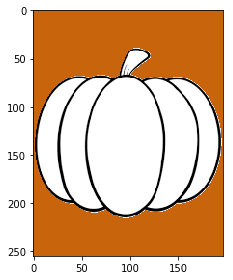

In [8]:
imshow(img)